# LAB 1. Знакомство с Jupyter Notebook

## * Useful imports

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import HTML, display
from collections import defaultdict
from typing import List

## * Reading datasets

In [4]:
data_sets_files = ["set_1.csv", "set_2.csv", "set_3.csv"]
data_sets = [pd.read_csv(filename, header=None).values.flatten() for filename in data_sets_files]

## * Universal function for creating histograms for datasets

In [5]:
def plotting_dataset(dataset: List[float] | List[int], bins_count: int, data_percent: float):
    
    N = len(dataset)
    n = math.ceil(1 + 1.14 * math.log(N))
    
    min_val = min(dataset)
    max_val = max(dataset)
    
    step = (max_val - min_val) / n

    print(n, min_val, max_val, step)

    intervals = defaultdict(int)
    
    for val in dataset:
        index = math.ceil((val - min_val) / step)
        intervals[index] += 1

    keys = sorted(intervals.keys())
    intervals = {key: intervals[key] for key in sorted(intervals)}
    
    for val in keys:
        if intervals[val] / N < data_percent:
            intervals.pop(val)

    keys = sorted(intervals.keys())

    max_val = keys[len(keys) - 1] * step + min_val
    min_val = keys[0] * step + min_val

    plt.hist([val for val in dataset if val <= max_val and val >= min_val], bins=bins_count, color="red", edgecolor="black", linewidth=1.2)

    plt.title("Гистограмма")
    plt.xlabel("Значения")
    plt.ylabel("Частота")

    plt.show()


### Plotting dataset 1

15 1 66 4.333333333333333


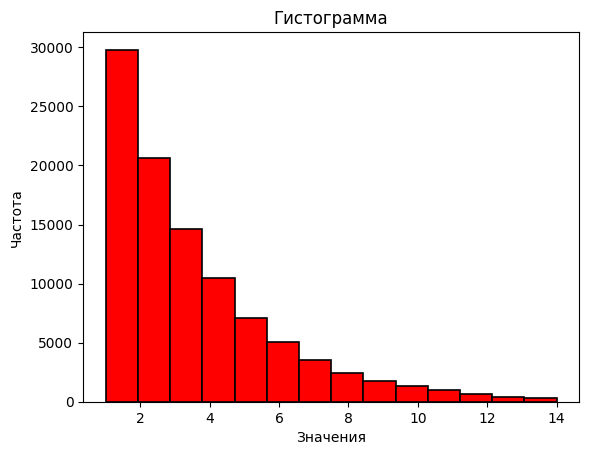

In [6]:
plotting_dataset(data_sets[0], 14, 0.01)

### Plotting dataset 2

12 -1071.786686 698.777979 147.54705541666667


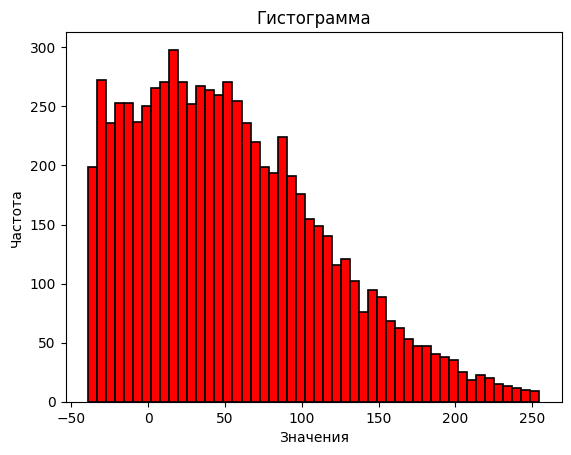

In [7]:
plotting_dataset(data_sets[1], 50, 0.1)

### Plotting dataset 3

15 -1.989815 2.433138 0.2948635333333333


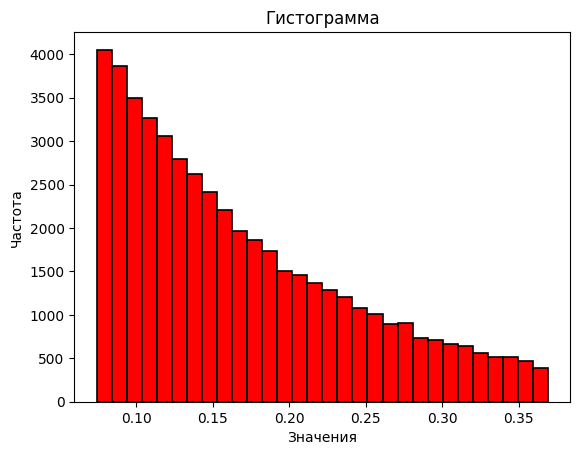

In [8]:
plotting_dataset(data_sets[2], 30, 0.1)

In [9]:
def mean(values: List[float | int]):
    if not values:
        return None

    return sum([key * value / len(values) for key, value in Counter(values).items()])

def variance(values: List[float | int]):
    
    return math.sqrt(mean([s ** 2 for s in values]) - mean(values) ** 2)

means = [mean(data_set.tolist()) for data_set in data_sets]

variances = [variance(data_set.tolist()) for data_set in data_sets]

data = {
    'Headers': data_sets_files,
    'Mean': means,
    'Variance': variances
}
table = f"""<table>
<tr>
<th></th>
{[f"<th>{header}</th>" for header in data_sets_files]}
</tr>
<tr>
<td>Mean</td>
{[f"<td>{mean}</td>" for mean in data["Mean"]]}
</tr>
<tr>
<td>Variance</td>
{[f"<td>{variance}</td>" for variance in data["Variance"]]}
</tr>
</table>"""

display(HTML(table))

,set_1.csv,set_2.csv,set_3.csv
Mean,3.44078,16.24328321380006,0.12448845074999963
Variance,3.1698884825179583,104.53422706297373,0.160141921488842


In [13]:
def geometric_distribution(mean: float, variance: float, size: int):
    while mean < 1:
        mean *= 10
    p = 1 / mean

    sample = np.random.geometric(p, size)

    # sample_mean = np.mean(sample)
    # sample_variance = np.var(sample)
    # sample = (sample - sample_mean) * np.sqrt(variance / sample_variance) + mean

    return sample

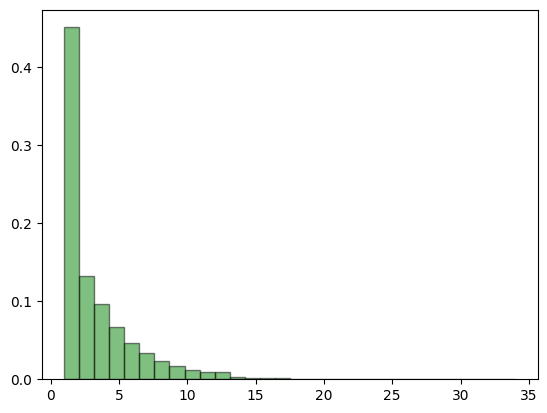

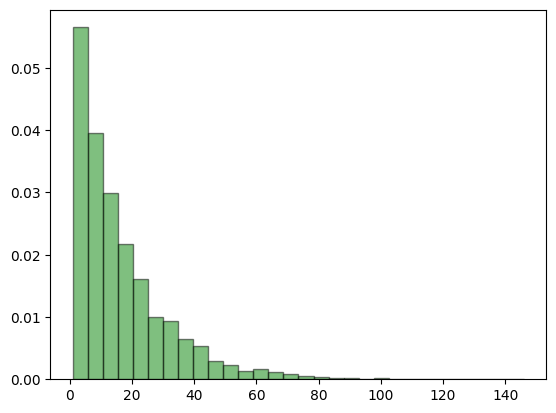

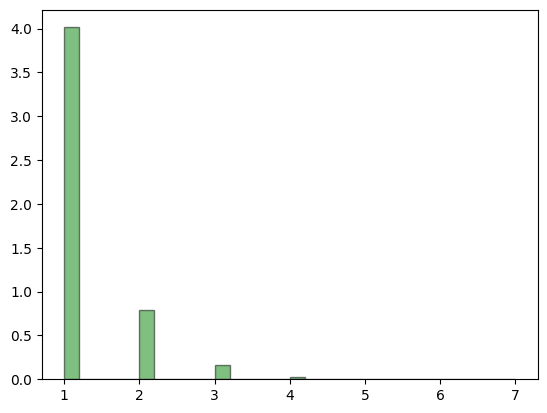

In [14]:
for mean, variance, data_set in zip(means, variances, data_sets):
    sample = geometric_distribution(mean, variance, len(data_set))
    plt.hist(sample, bins=30, density=True, alpha=0.5, color='g', edgecolor='black')
    plt.show()


In [21]:
def binomial_distribution(mean, variance, size):
    while variance < 1:
        variance *= 10

    p = 1 - mean / variance
    print(p)
    n = mean**2 / (variance - mean)

    sample = np.random.binomial(n, p, size)

    return sample

In [22]:
for mean, variance, data_set in zip(means, variances, data_sets):
    sample = binomial_distribution(mean, variance, len(data_set))
    plt.hist(sample, bins=30, density=True, alpha=0.5, color='g', edgecolor='black')
    plt.show()

-0.08545774369540693


ValueError: p < 0, p > 1 or p is NaN

In [ ]:
plt.hist(random_uniform, bins=15, density=True, alpha=0.5)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма для равномерного распределения')
plt.show()

In [ ]:
plt.hist(random_norm, bins=15, density=True, alpha=0.5)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма для нормального распределения')
plt.show()

In [ ]:
plt.hist(random_expon, bins=15, density=True, alpha=0.5)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма для экспоненциального распределения')
plt.show()